In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
df = pd.read_excel("GDP de México.xlsx")
df

,Periodo,GDP
0,1960,1.304000e+10
1,1961,1.416000e+10
2,1962,1.520000e+10
3,1963,1.696000e+10
4,1964,2.008000e+10
...,...,...
57,2017,1.158913e+12
58,2018,1.222408e+12
59,2019,1.269404e+12
60,2020,1.087118e+12


Text(0, 0.5, 'Producto interno bruto')

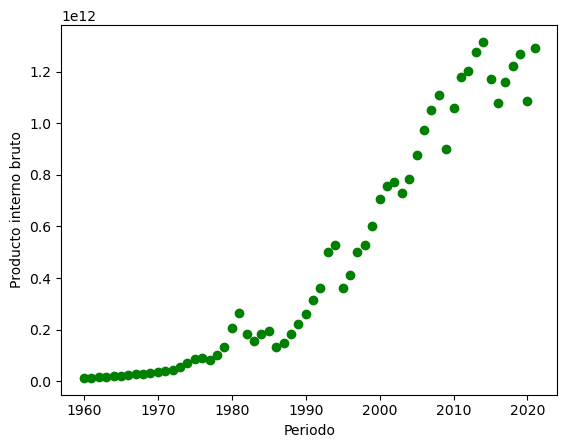

In [82]:
plt.scatter(df.Periodo, df.GDP, color = 'green')
plt.xlabel('Periodo')
plt.ylabel('Producto interno bruto')

In [84]:
def logistico(x, beta0, beta1):
    y =  1 / (1 + np.exp(beta0 * (x - beta1)))
    return y

In [86]:
msk = np.random.rand(len(df)) <= 0.80
msk

array([False,  True, False,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True, False,  True, False,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True, False,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True])

In [88]:
train_x = df[msk]['Periodo']
test_x = df[~msk]['Periodo']
train_y = df[msk]['GDP']
test_y = df[~msk]['GDP']

In [90]:
popt, pcov = curve_fit(logistico, train_x, train_y)

/opt/anaconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/c2/0hk0hmxd4zngvs6gpgdr_4qc0000gn/T/ipykernel_6358/3832967183.py:1: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(logistico, train_x, train_y)


In [92]:
print('beta0 =', popt[0], 'beta1 =', popt[1])

beta0 = 1.0 beta1 = 1.0


In [94]:
# prediccion
y_hat = logistico(test_x, *popt)

/opt/anaconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [96]:
# Evaluacion de los errores
print('Mean absolute error: %.2f' % np.mean(np.absolute(y_hat - test_y)))
print('Residual sum of squares (MSE): %.2f' % np.mean((y_hat - test_y)**2))
print('R2-score: %.2f' % r2_score(y_hat, test_y))

Mean absolute error: 436170164700.89
Residual sum of squares (MSE): 377495667352996430217216.00
R2-score: 0.00


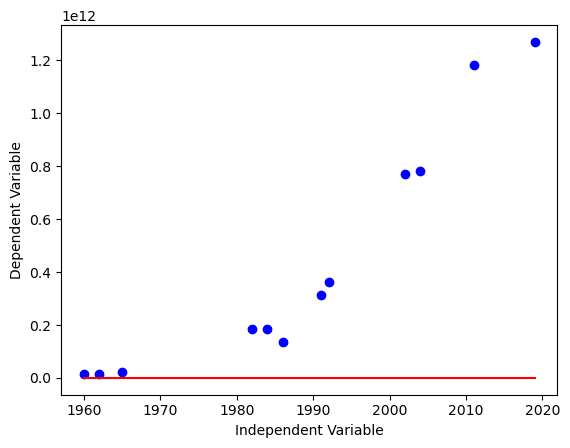

In [98]:
plt.plot(test_x, test_y, 'bo')
plt.plot(test_x, y_hat, 'r')
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.show()

In [100]:
df_normalizado = (df - df.min()) / (df.max() - df.min())
df_normalizado

,Periodo,GDP
0,0.000000,0.000000
1,0.016393,0.000860
2,0.032787,0.001659
3,0.049180,0.003010
4,0.065574,0.005406
...,...,...
57,0.934426,0.879877
58,0.950820,0.928632
59,0.967213,0.964719
60,0.983607,0.824747


In [102]:
train_x = df_normalizado[msk]['Periodo']
test_x = df_normalizado[~msk]['Periodo']
train_y = df_normalizado[msk]['GDP']
test_y = df_normalizado[~msk]['GDP']

In [104]:
popt, pcov = curve_fit(logistico, train_x, train_y)

In [106]:
print('beta0 =', popt[0], 'beta1 =', popt[1])

beta0 = -8.378733512549083 beta1 = 0.6491013806589347


In [108]:
# prediccion
y_hat = logistico(test_x, *popt)

In [110]:
# Evaluacion de los errores
print('Mean absolute error: %.2f' % np.mean(np.absolute(y_hat - test_y)))
print('Residual sum of squares (MSE): %.2f' % np.mean((y_hat - test_y)**2))
print('R2-score: %.2f' % r2_score(y_hat, test_y))

Mean absolute error: 0.02
Residual sum of squares (MSE): 0.00
R2-score: 0.99


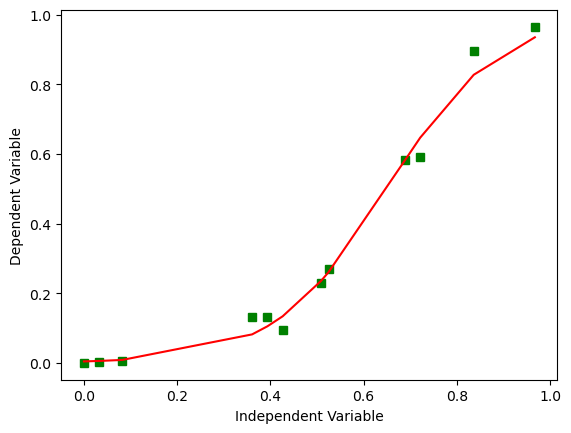

In [114]:
plt.plot(test_x, test_y, 'gs')
plt.plot(test_x, y_hat, 'r')
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.show()

In [132]:
# prediccion
y_predict = logistico(2022, -8.378733512549083, 0.6491013806589347)
print(y_predict)

1.0


In [136]:
val = df['GDP'].max()
val

1315351183524.544